In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import preliz as pz

In [ ]:
plt.rcdefaults()
az.style.use(["arviz-whitegrid", "arviz-colors"])
plt.rc('figure', dpi=450)


Text(0.5, 0, 'Chemical shift (ppm)')

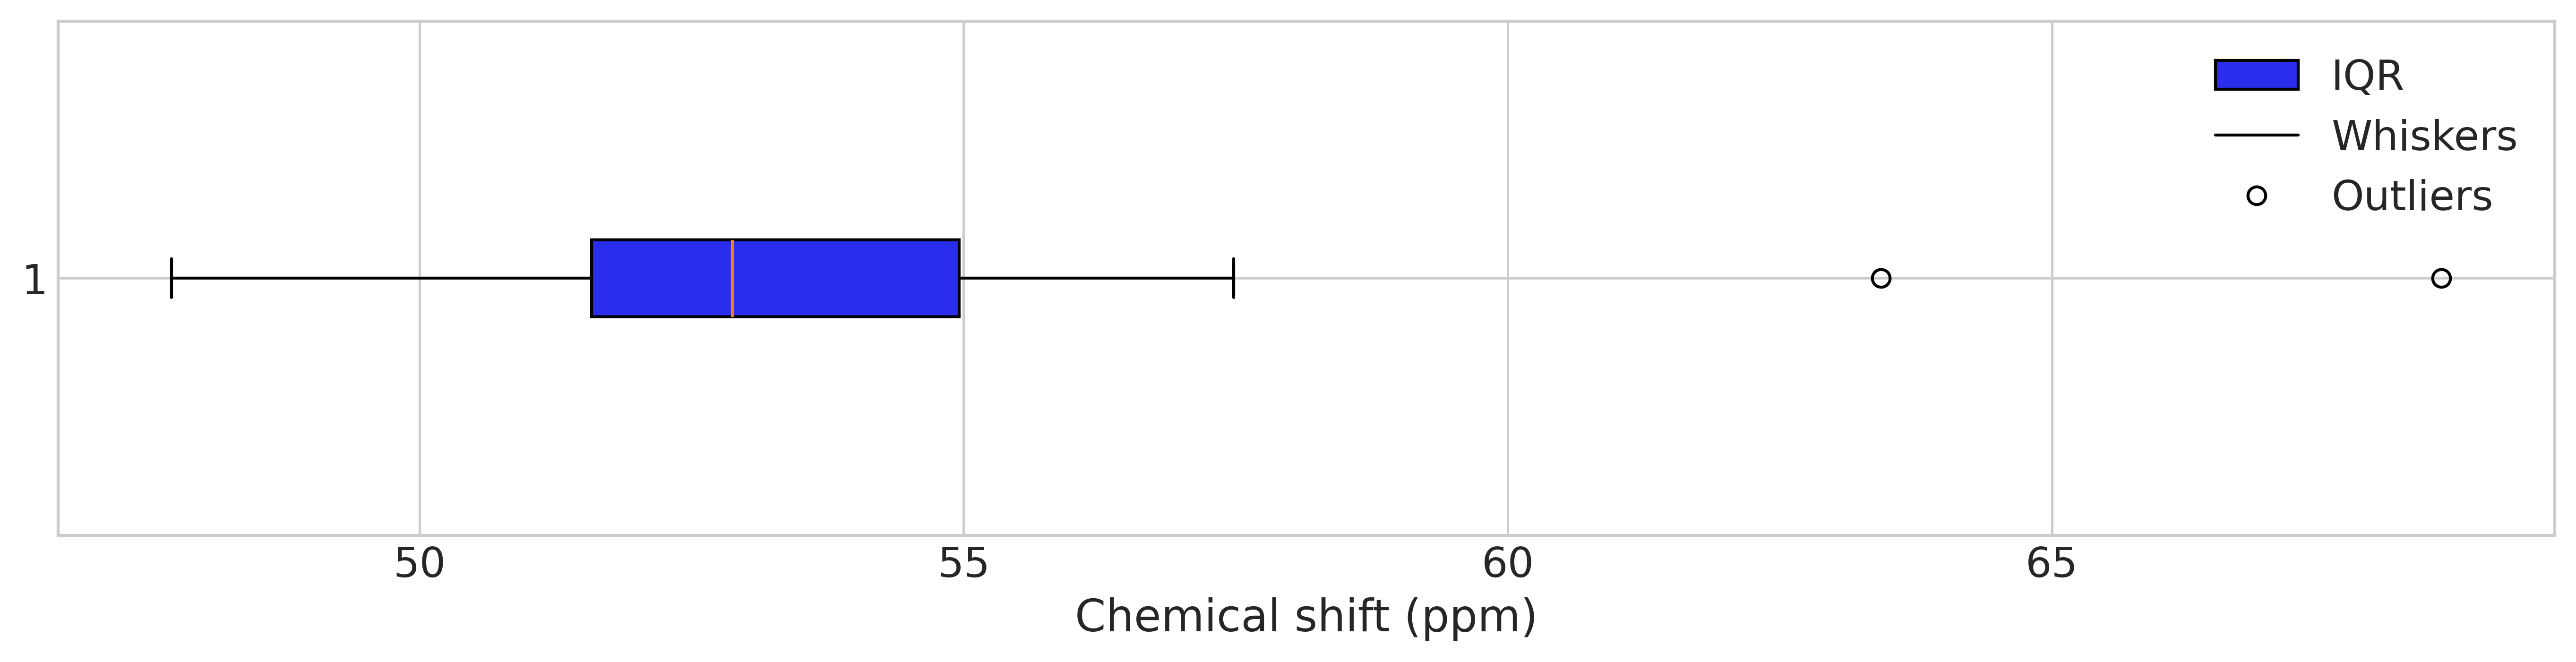

In [20]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

data = np.loadtxt("https://github.com/aloctavodia/BAP3/raw/refs/heads/main/code/data/chemical_shifts.csv")
_, ax = plt.subplots(figsize=(12, 3))

bp = ax.boxplot(data, vert=False, patch_artist=True)
box_patch = bp["boxes"][0]
whisker_line = bp["whiskers"][0]
outlier_line = bp["fliers"][0]
ax.legend(
    [box_patch, whisker_line, outlier_line],
    ["IQR", "Whiskers", "Outliers"],
    loc="best"
)
ax.set_xlabel('Chemical shift (ppm)')


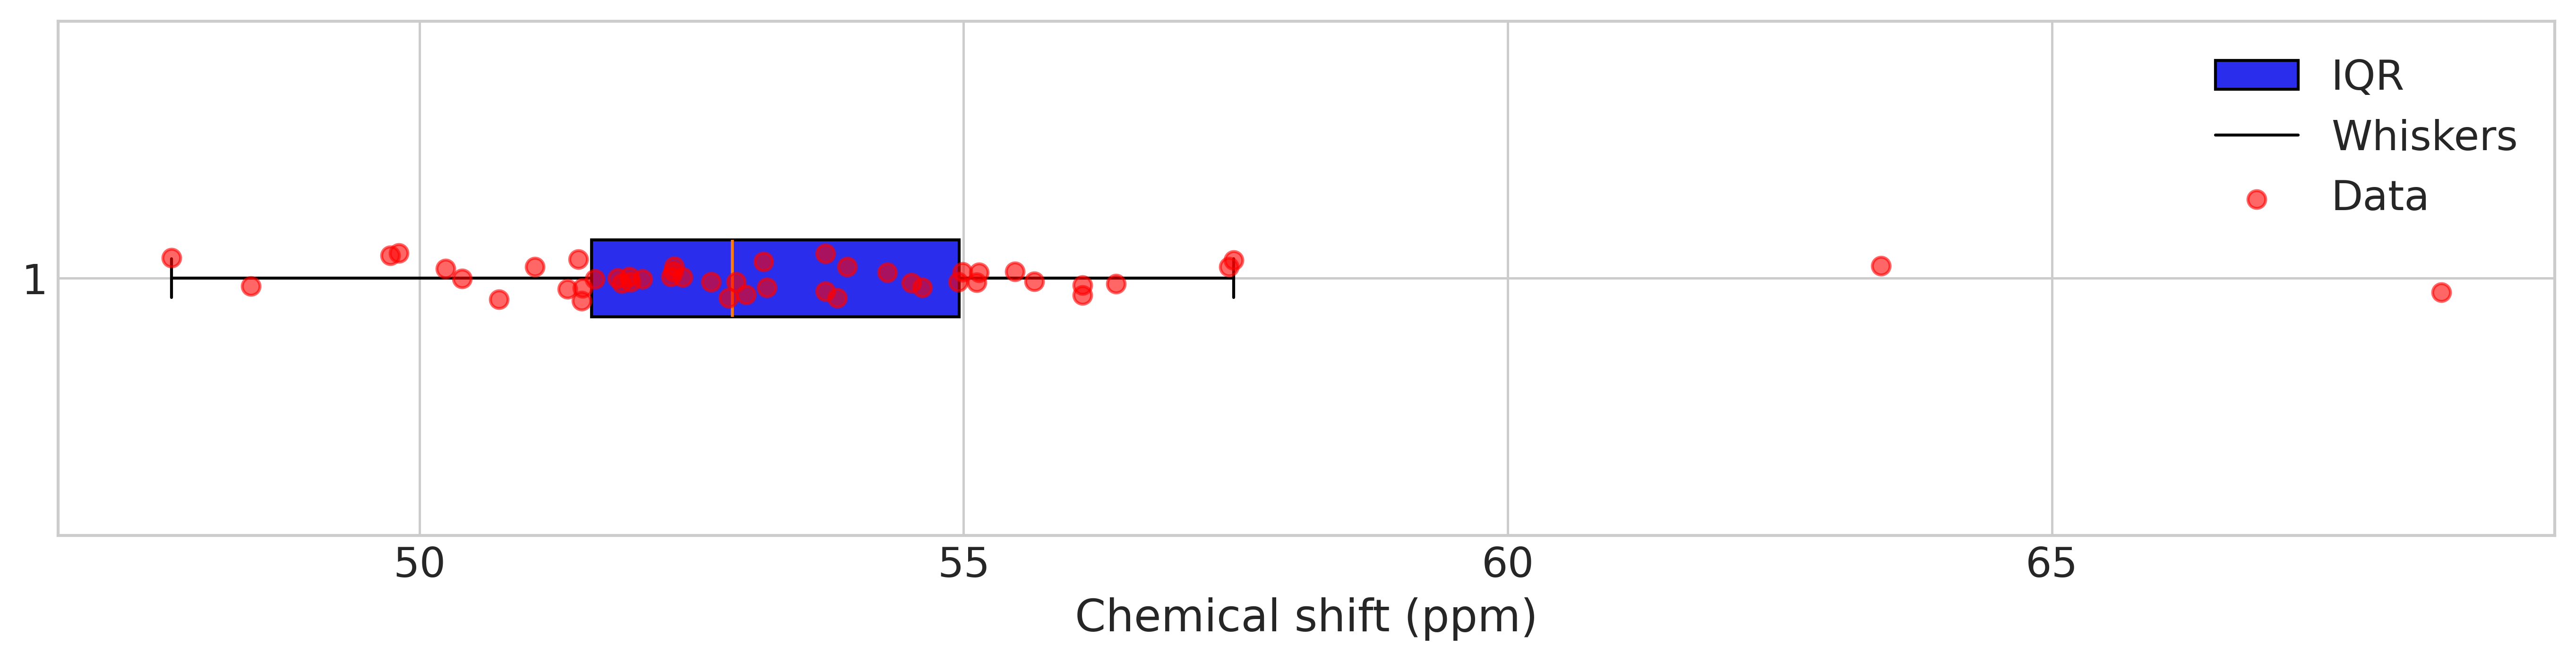

In [21]:
fig, ax = plt.subplots(figsize=(12, 3))
bp = ax.boxplot(data, vert=False, patch_artist=True)

# Label the boxplot
box_patch = bp["boxes"][0]
whisker_line = bp["whiskers"][0]
outlier_line = bp["fliers"][0]

ax.set_xlabel("Chemical shift (ppm)")

# Hide outliers
for flier in bp["fliers"]:
    flier.set_visible(False)

# Overlay data points with vertical jitter
y_jitter = np.random.uniform(-0.05, 0.05, size=len(data))
data_line = ax.scatter(data, np.ones_like(data) + y_jitter, alpha=0.6, color="red", zorder=5)

ax.legend([box_patch, whisker_line, data_line],
          ["IQR", "Whiskers", "Data"], loc="best")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16088\120687170.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


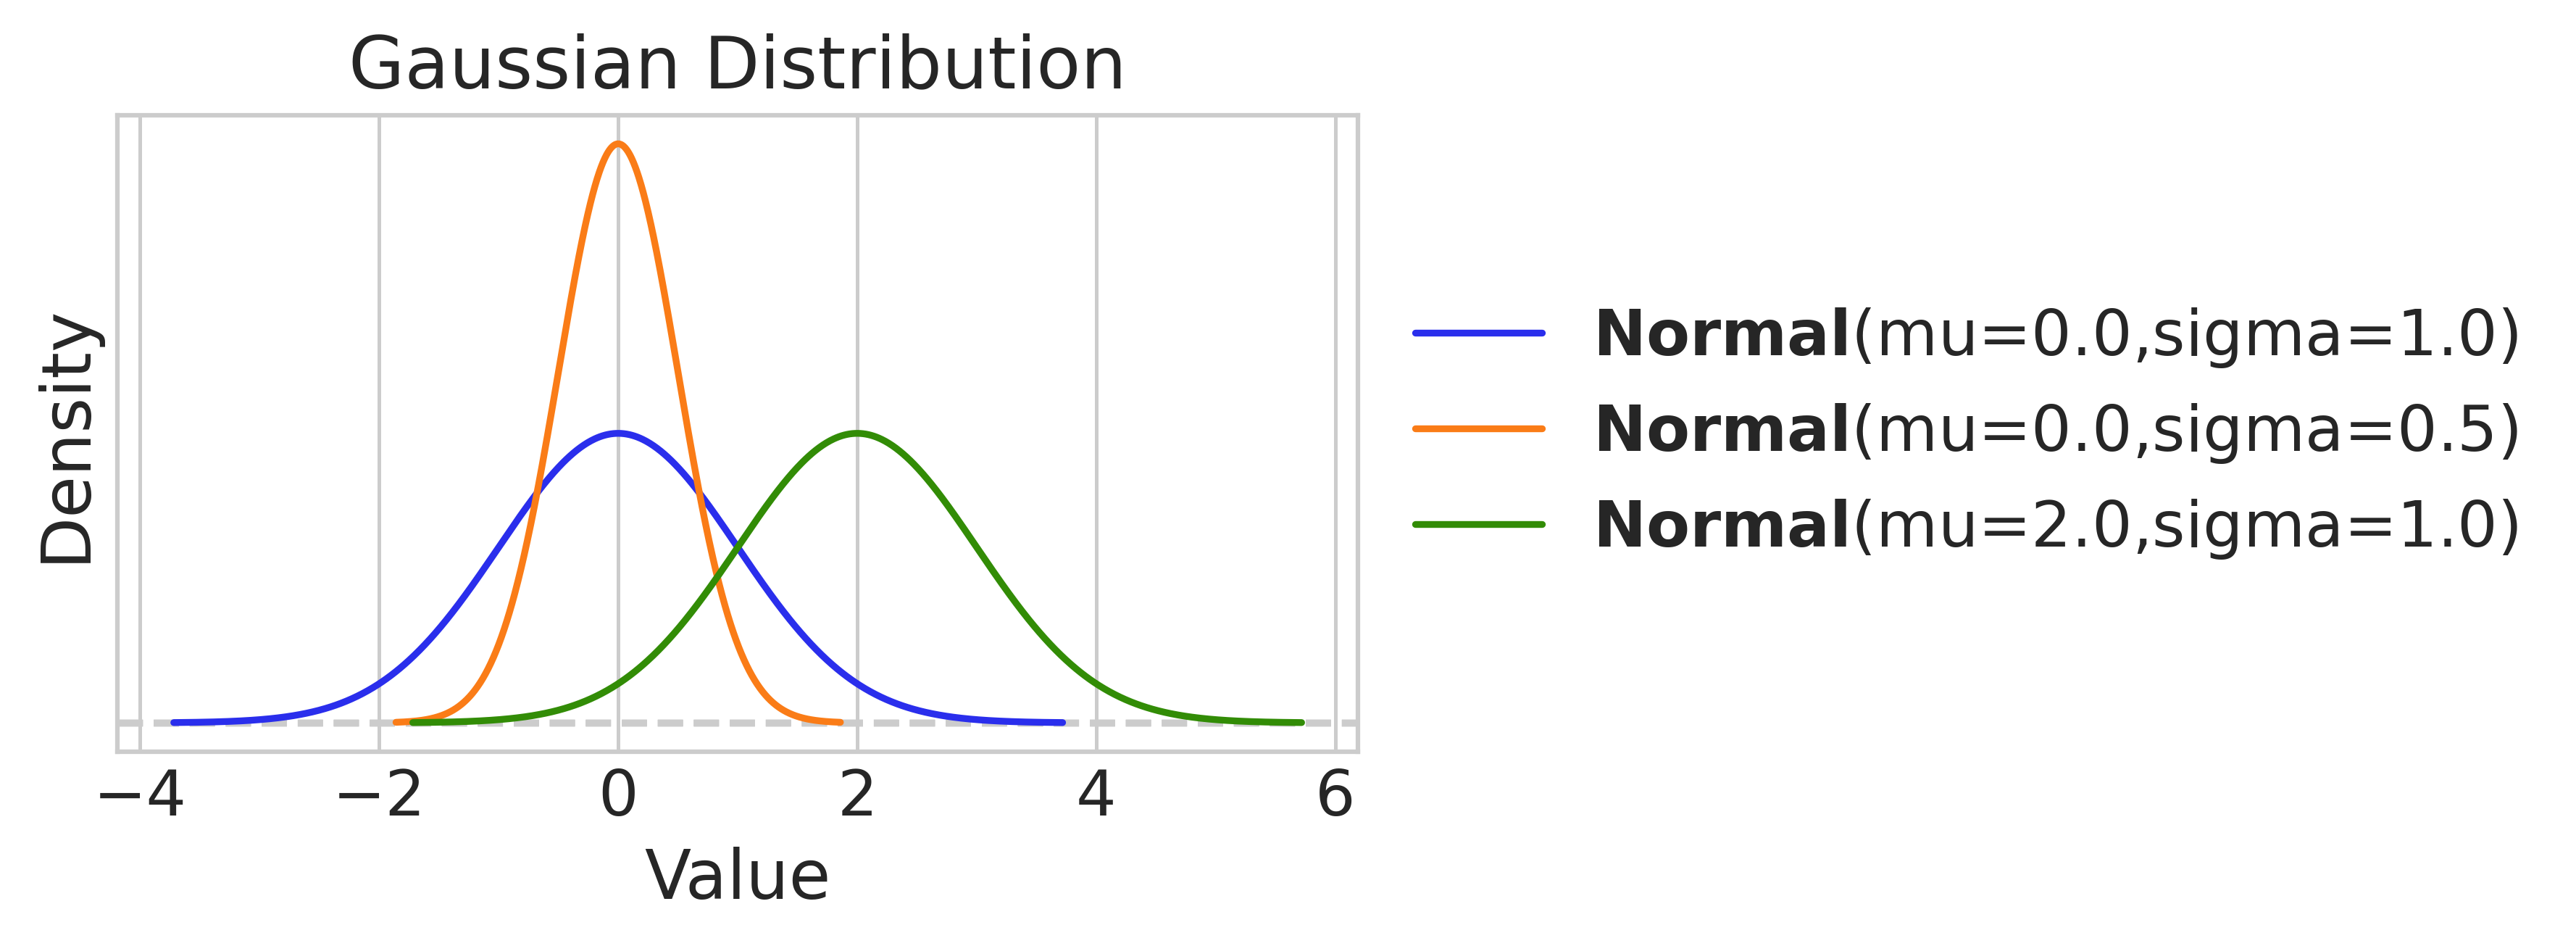

In [22]:
fig, ax = plt.subplots(figsize=(8, 3))

mu = [0, 0, 2]
sigma = [1, 0.5, 1]

for i in range(3):
    normal_distribution = pz.Normal(mu[i], sigma[i])
    normal_distribution.plot_pdf(ax=ax)

ax.set_title("Gaussian Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Density")

# Show the plot
plt.tight_layout()

C:\Users\User\AppData\Local\Temp\ipykernel_16088\259376426.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


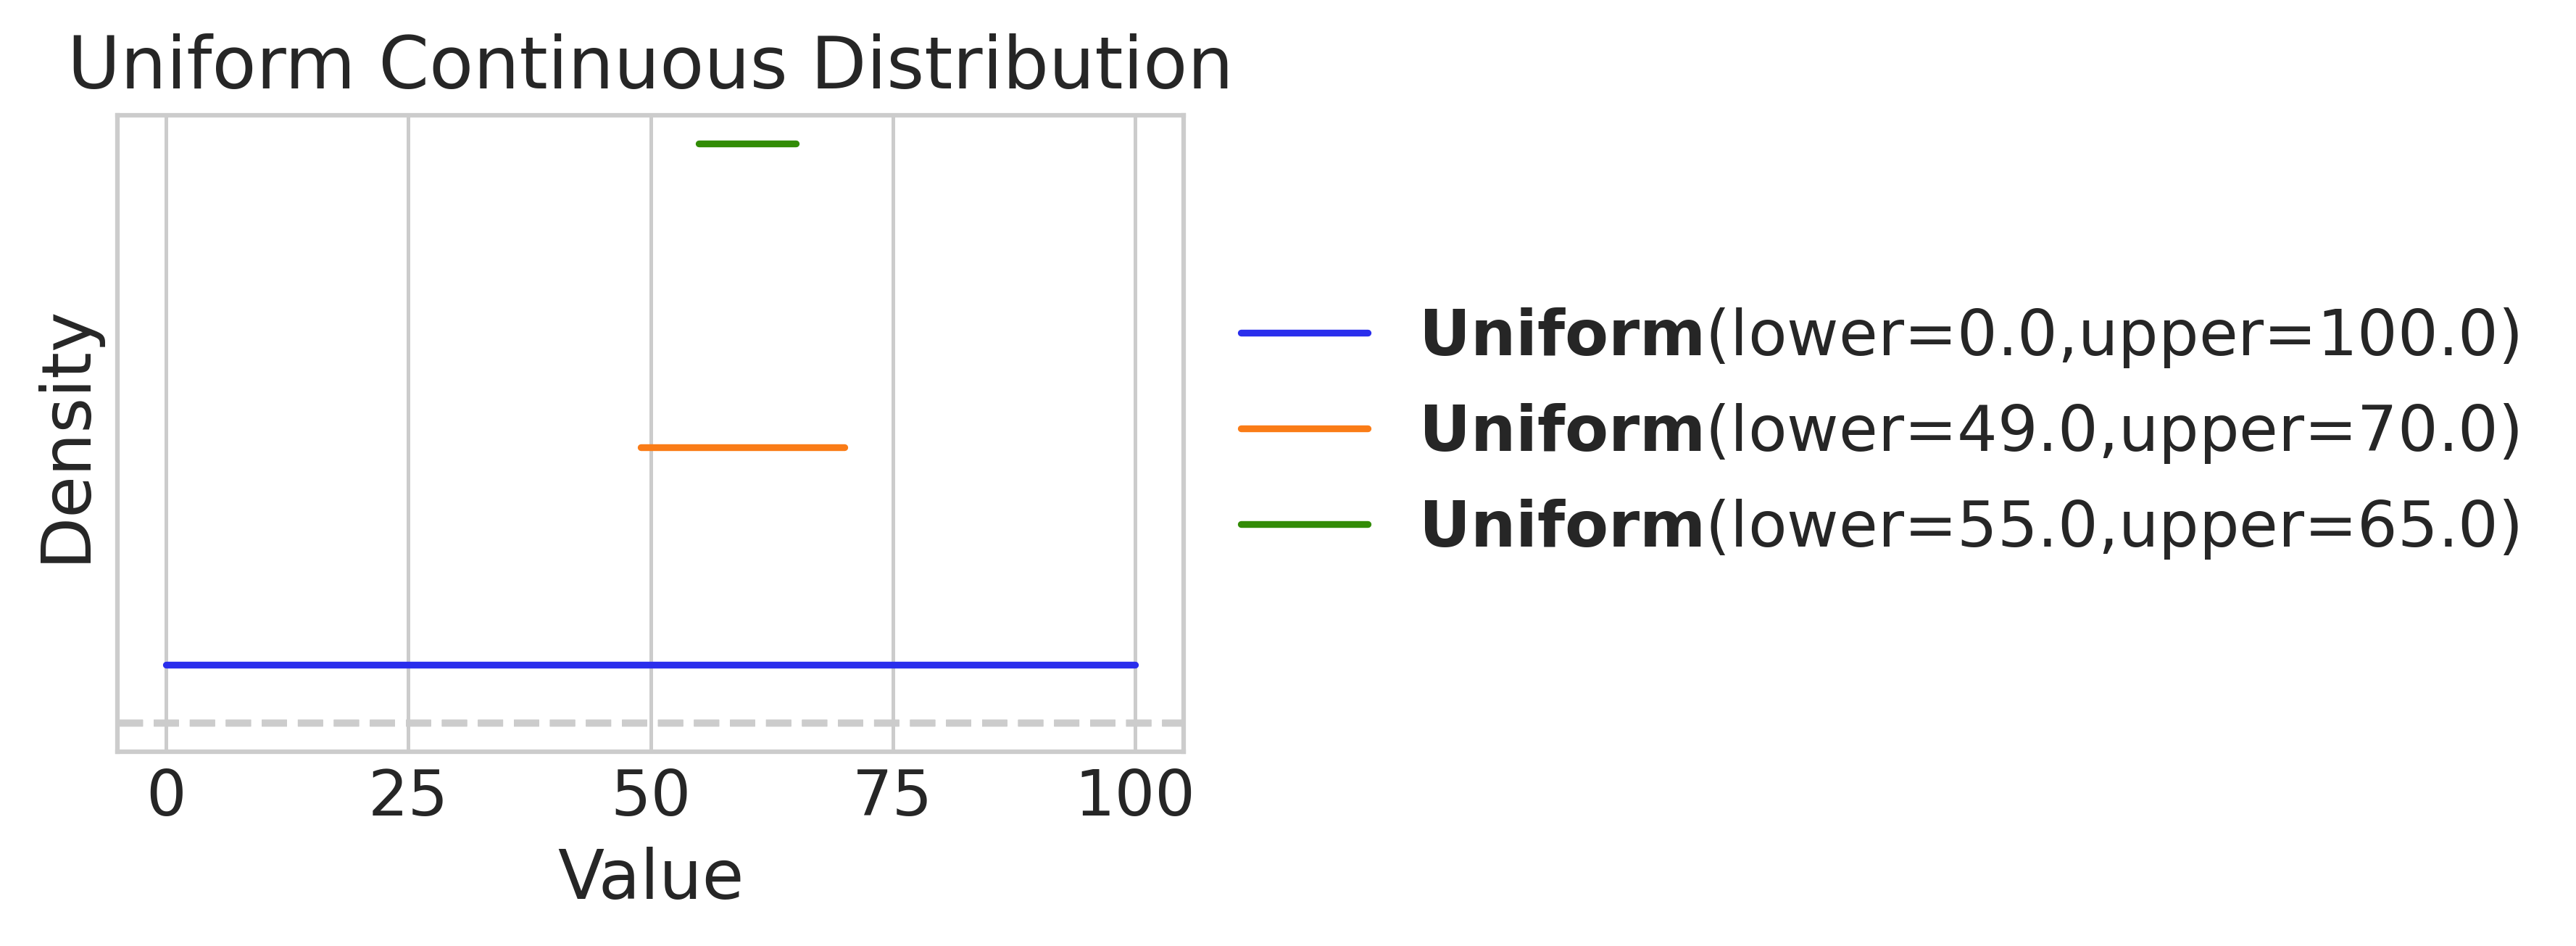

In [23]:
fig, ax = plt.subplots(figsize=(8, 3))

lower = [0, 49, 55]
upper = [100, 70, 65]

for i in range(3):
    uniform_distribution = pz.Uniform(lower[i], upper[i])
    uniform_distribution.plot_pdf(ax=ax)

ax.set_title("Uniform Continuous Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Density")

# Show the plot
plt.tight_layout()

C:\Users\User\AppData\Local\Temp\ipykernel_16088\514084823.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


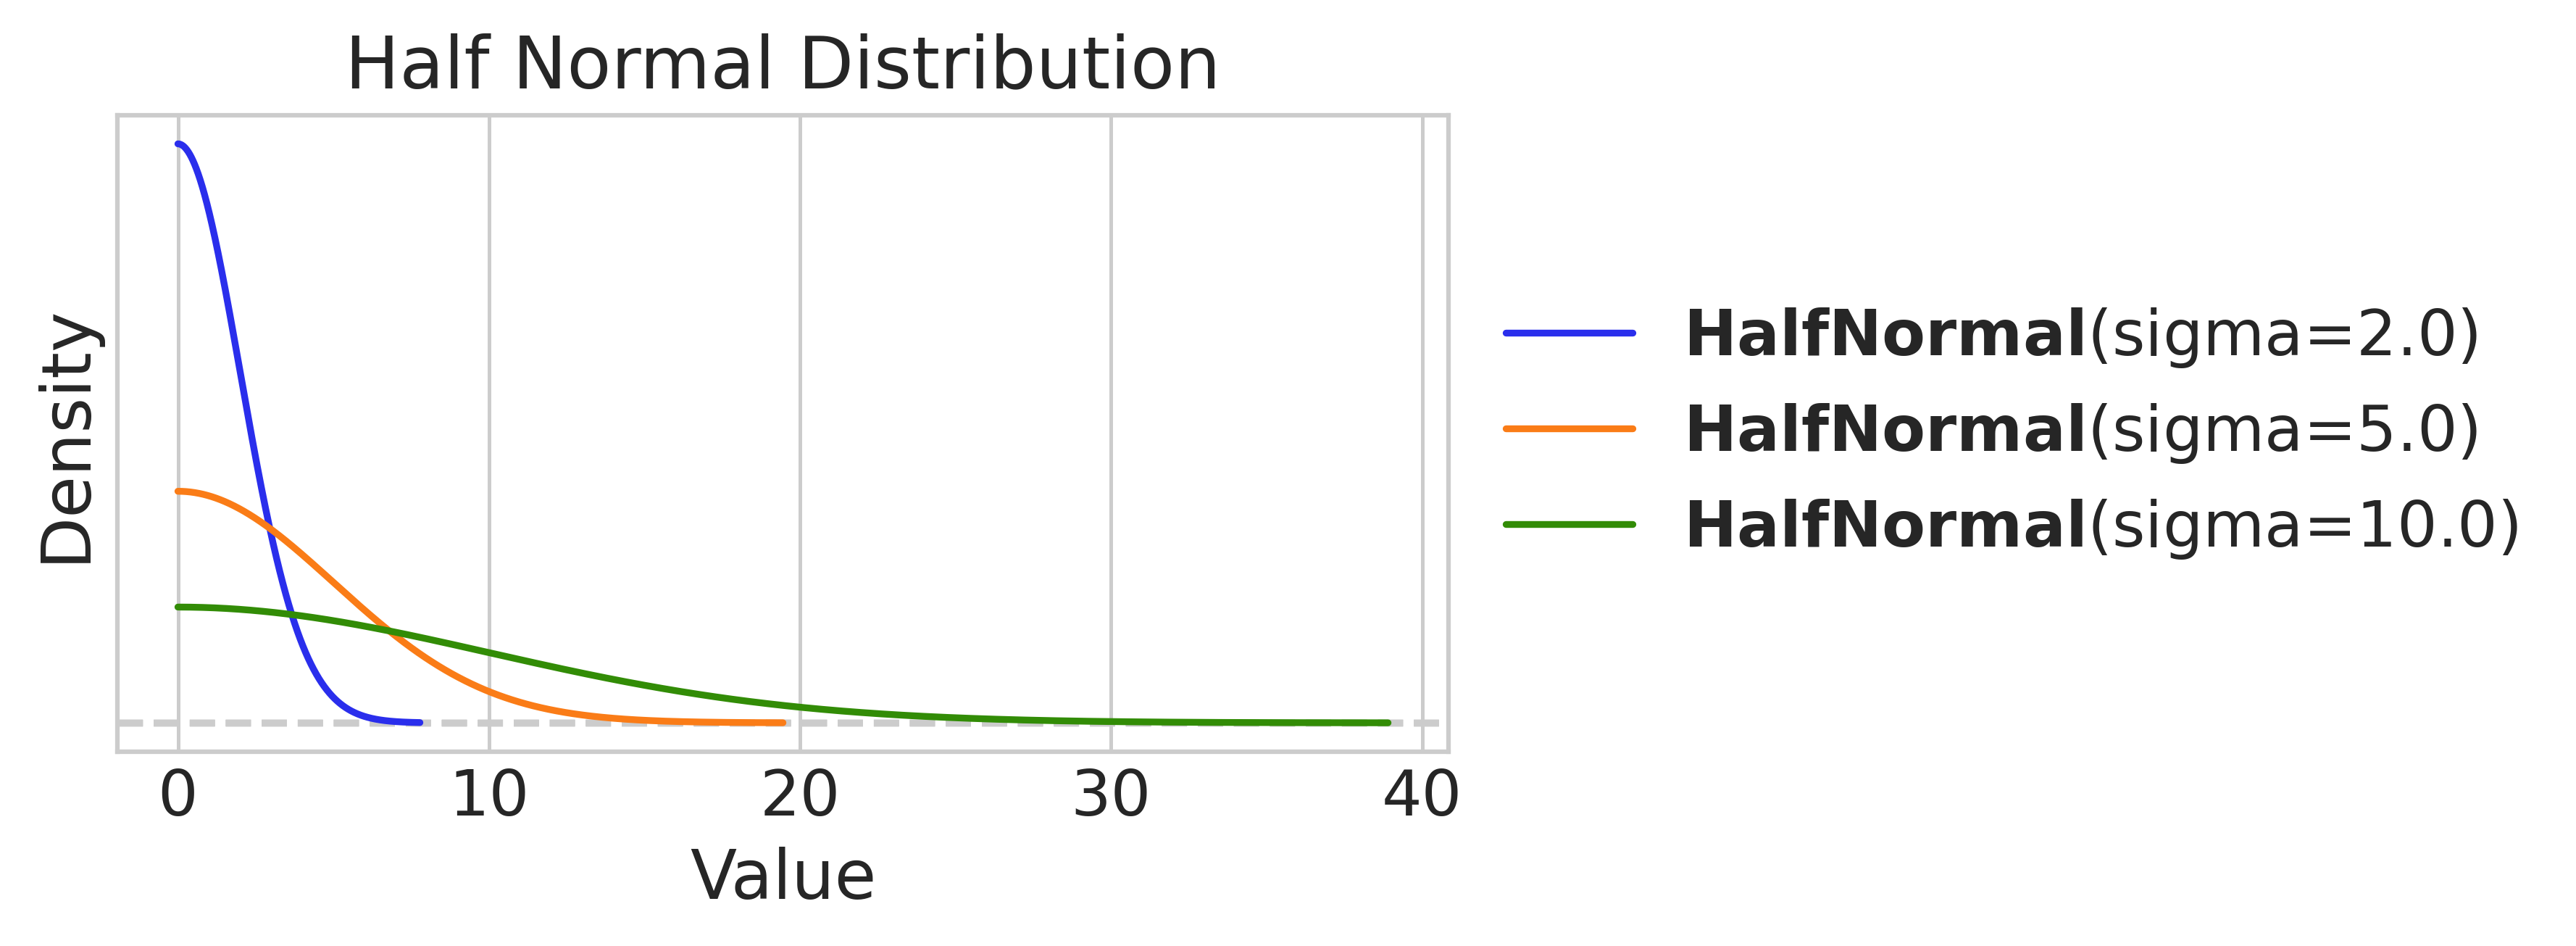

In [24]:
fig, ax = plt.subplots(figsize=(8, 3))

sigma = [2, 5, 10]

for i in range(3):
    halfnormal_dist = pz.HalfNormal(sigma[i])
    halfnormal_dist.plot_pdf(ax=ax)

ax.set_title("Half Normal Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Density")

# Show the plot
plt.tight_layout()

In [25]:
l_mu = 40
h_mu = 70
σ_σ = 5
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=l_mu, upper=h_mu)
    σ = pm.HalfNormal('σ', sigma=σ_σ)
    y = pm.Normal('y', mu=μ, sigma=σ, observed=data)
    

Sampling: [y, μ, σ]


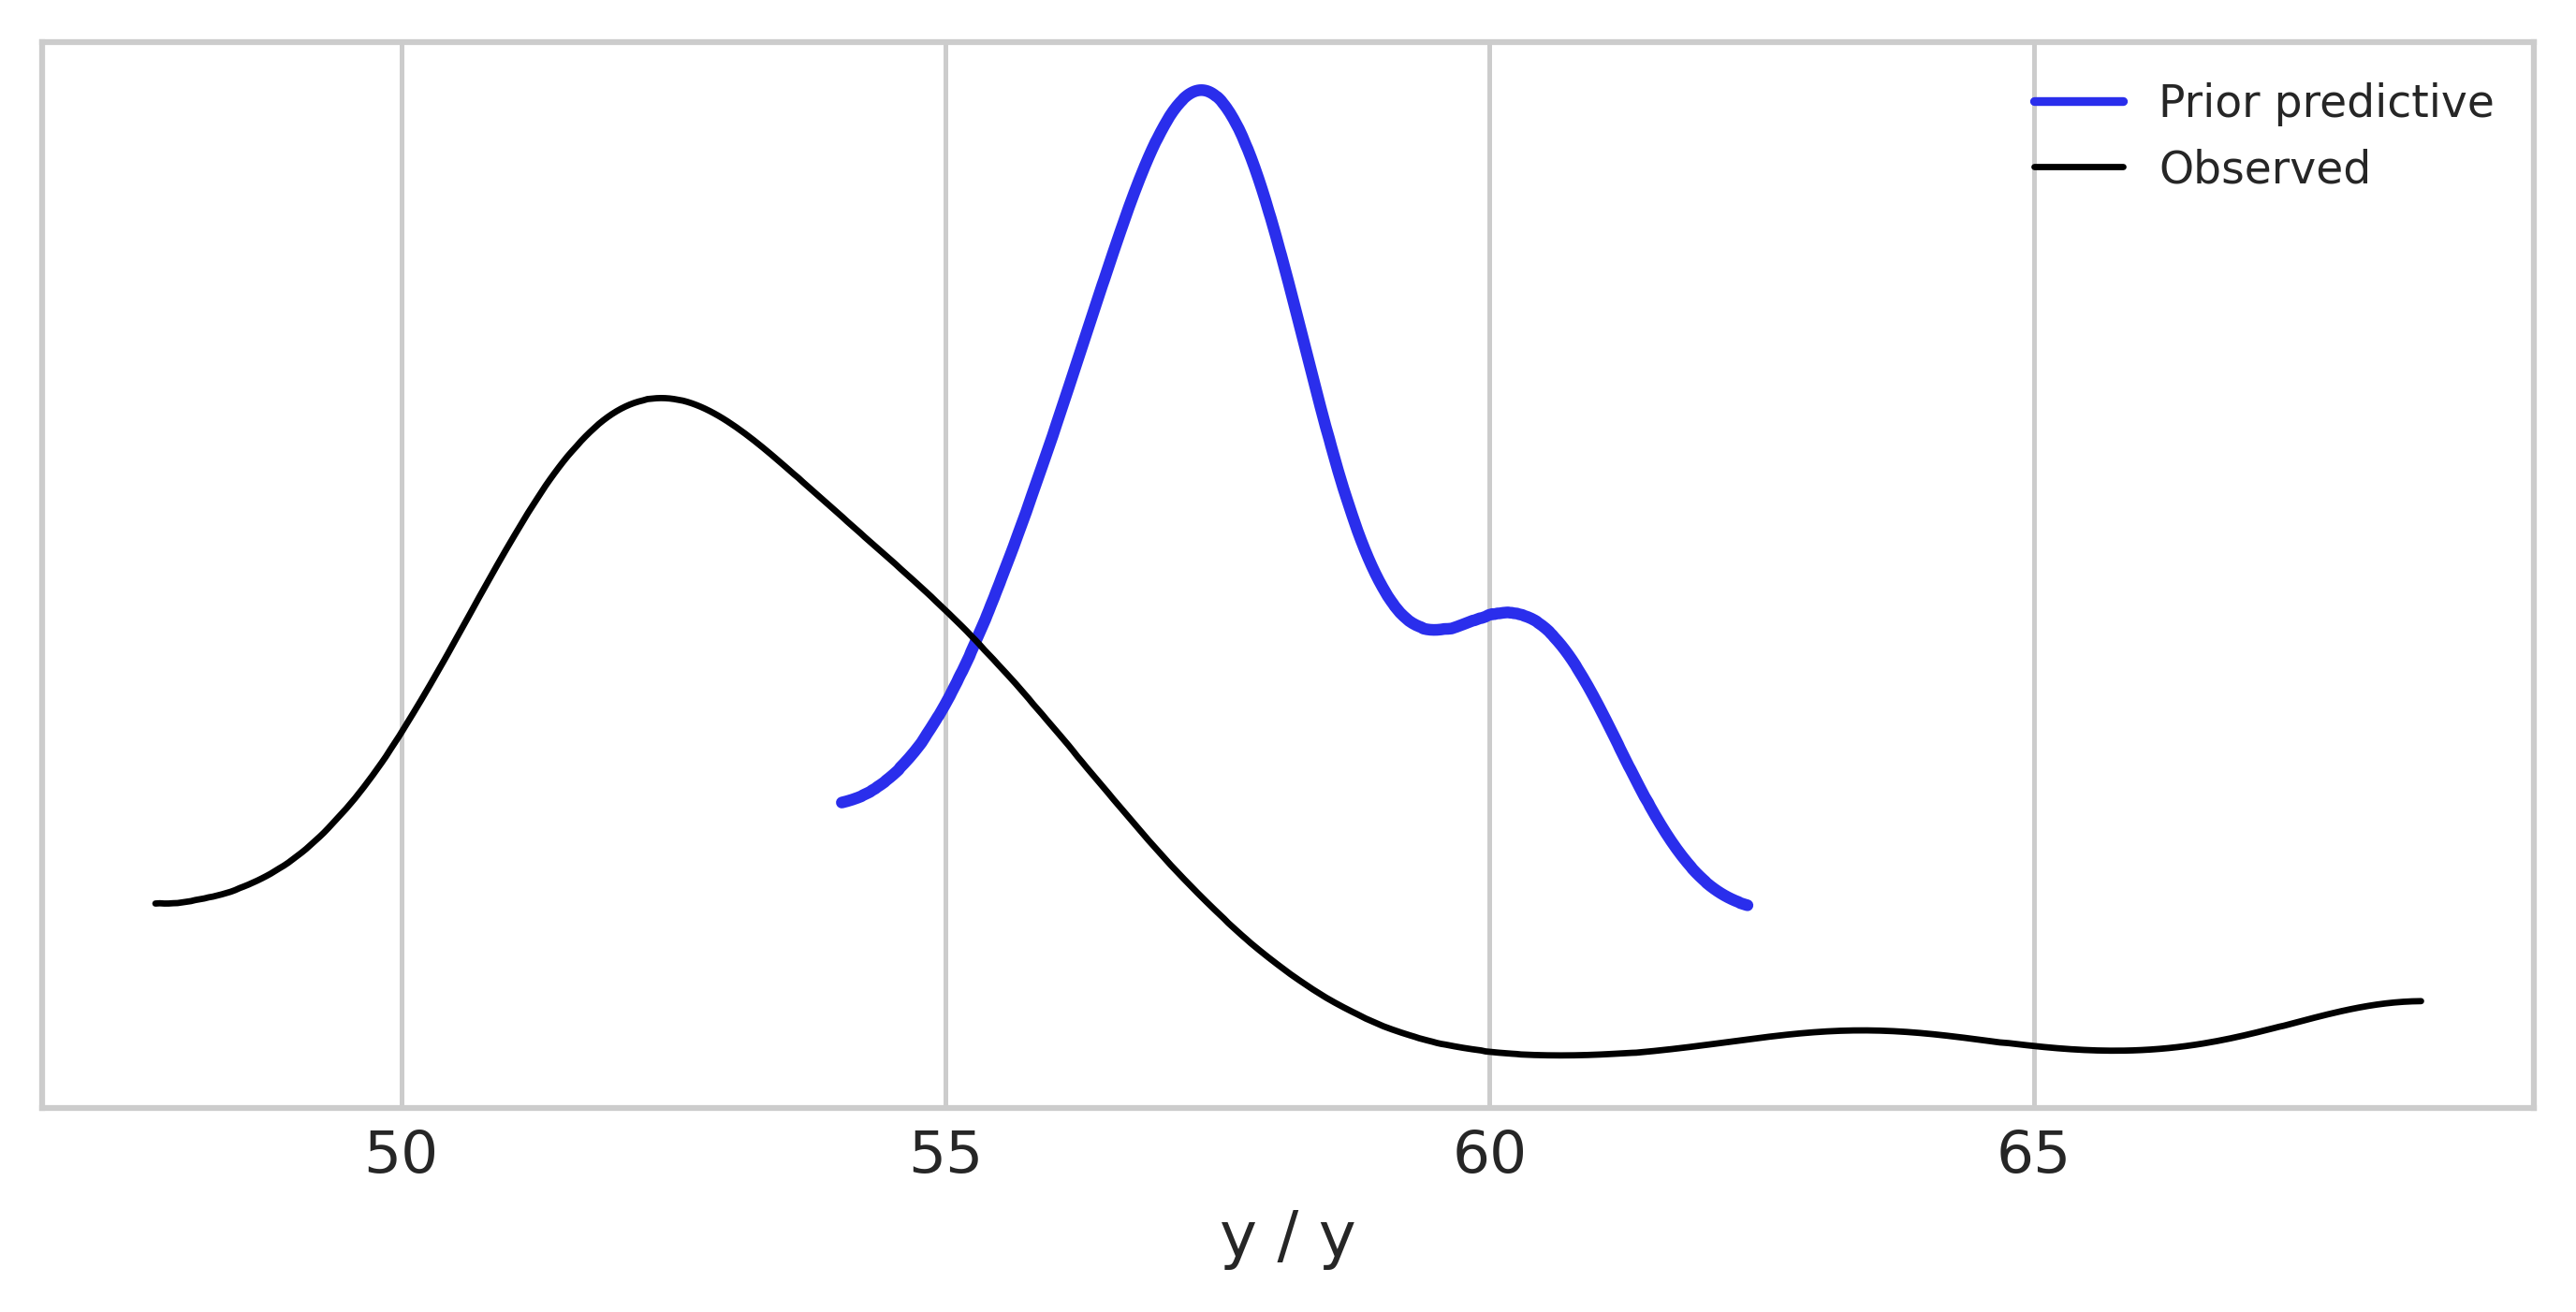

In [78]:
idata_g = pm.sample_prior_predictive(samples=1, model=model_g, random_seed=124)

ax = az.plot_ppc(idata_g, kind="kde", group="prior", mean=False, figsize=(6,3))
lines = ax.get_lines()

prior_line = lines[2]
prior_line.set_alpha(1.0)  # Make fully opaque
prior_line.set_linewidth(2.0)  # Make line thicker

plt.draw()

In [80]:
lines

<a list of 7 Line2D objects>

Sampling: [y, μ, σ]


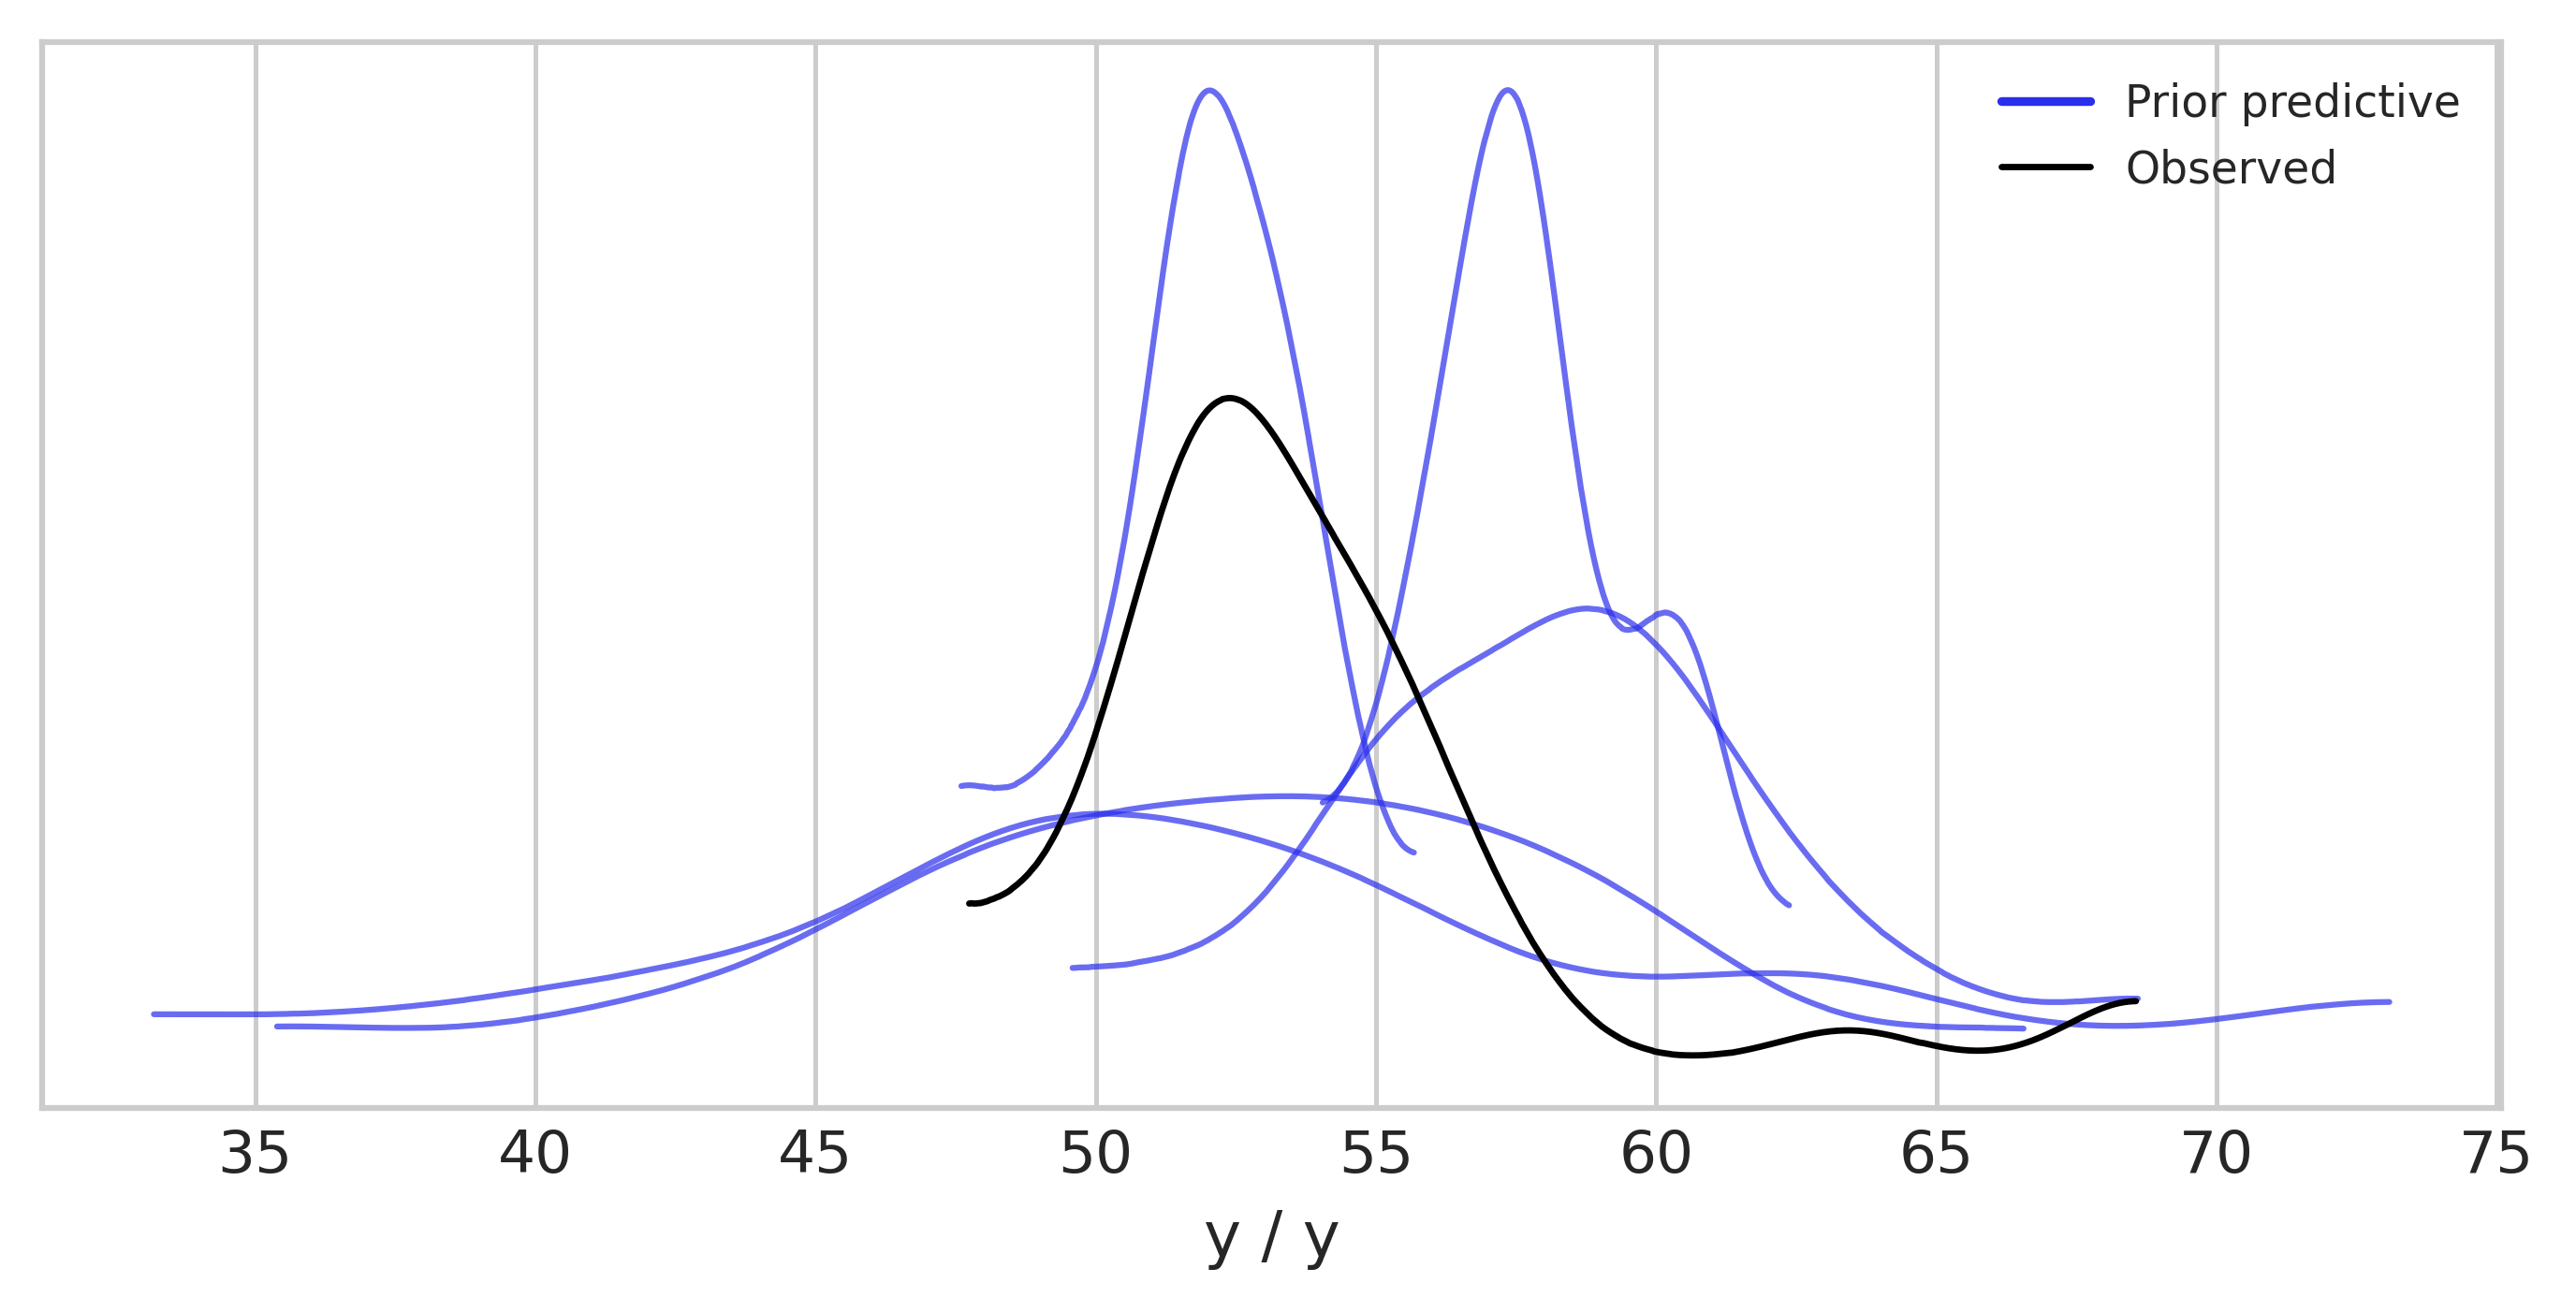

In [83]:
idata_g = pm.sample_prior_predictive(samples=5, model=model_g, random_seed=124)

ax = az.plot_ppc(idata_g, kind="kde", group="prior", mean=False, figsize=(6,3))
lines = ax.get_lines()

prior_lines = lines[2:]
for prior_line in prior_lines:
    prior_line.set_alpha(0.7)  
    prior_line.set_linewidth(1.0)  

plt.draw()

Sampling: [y, μ, σ]


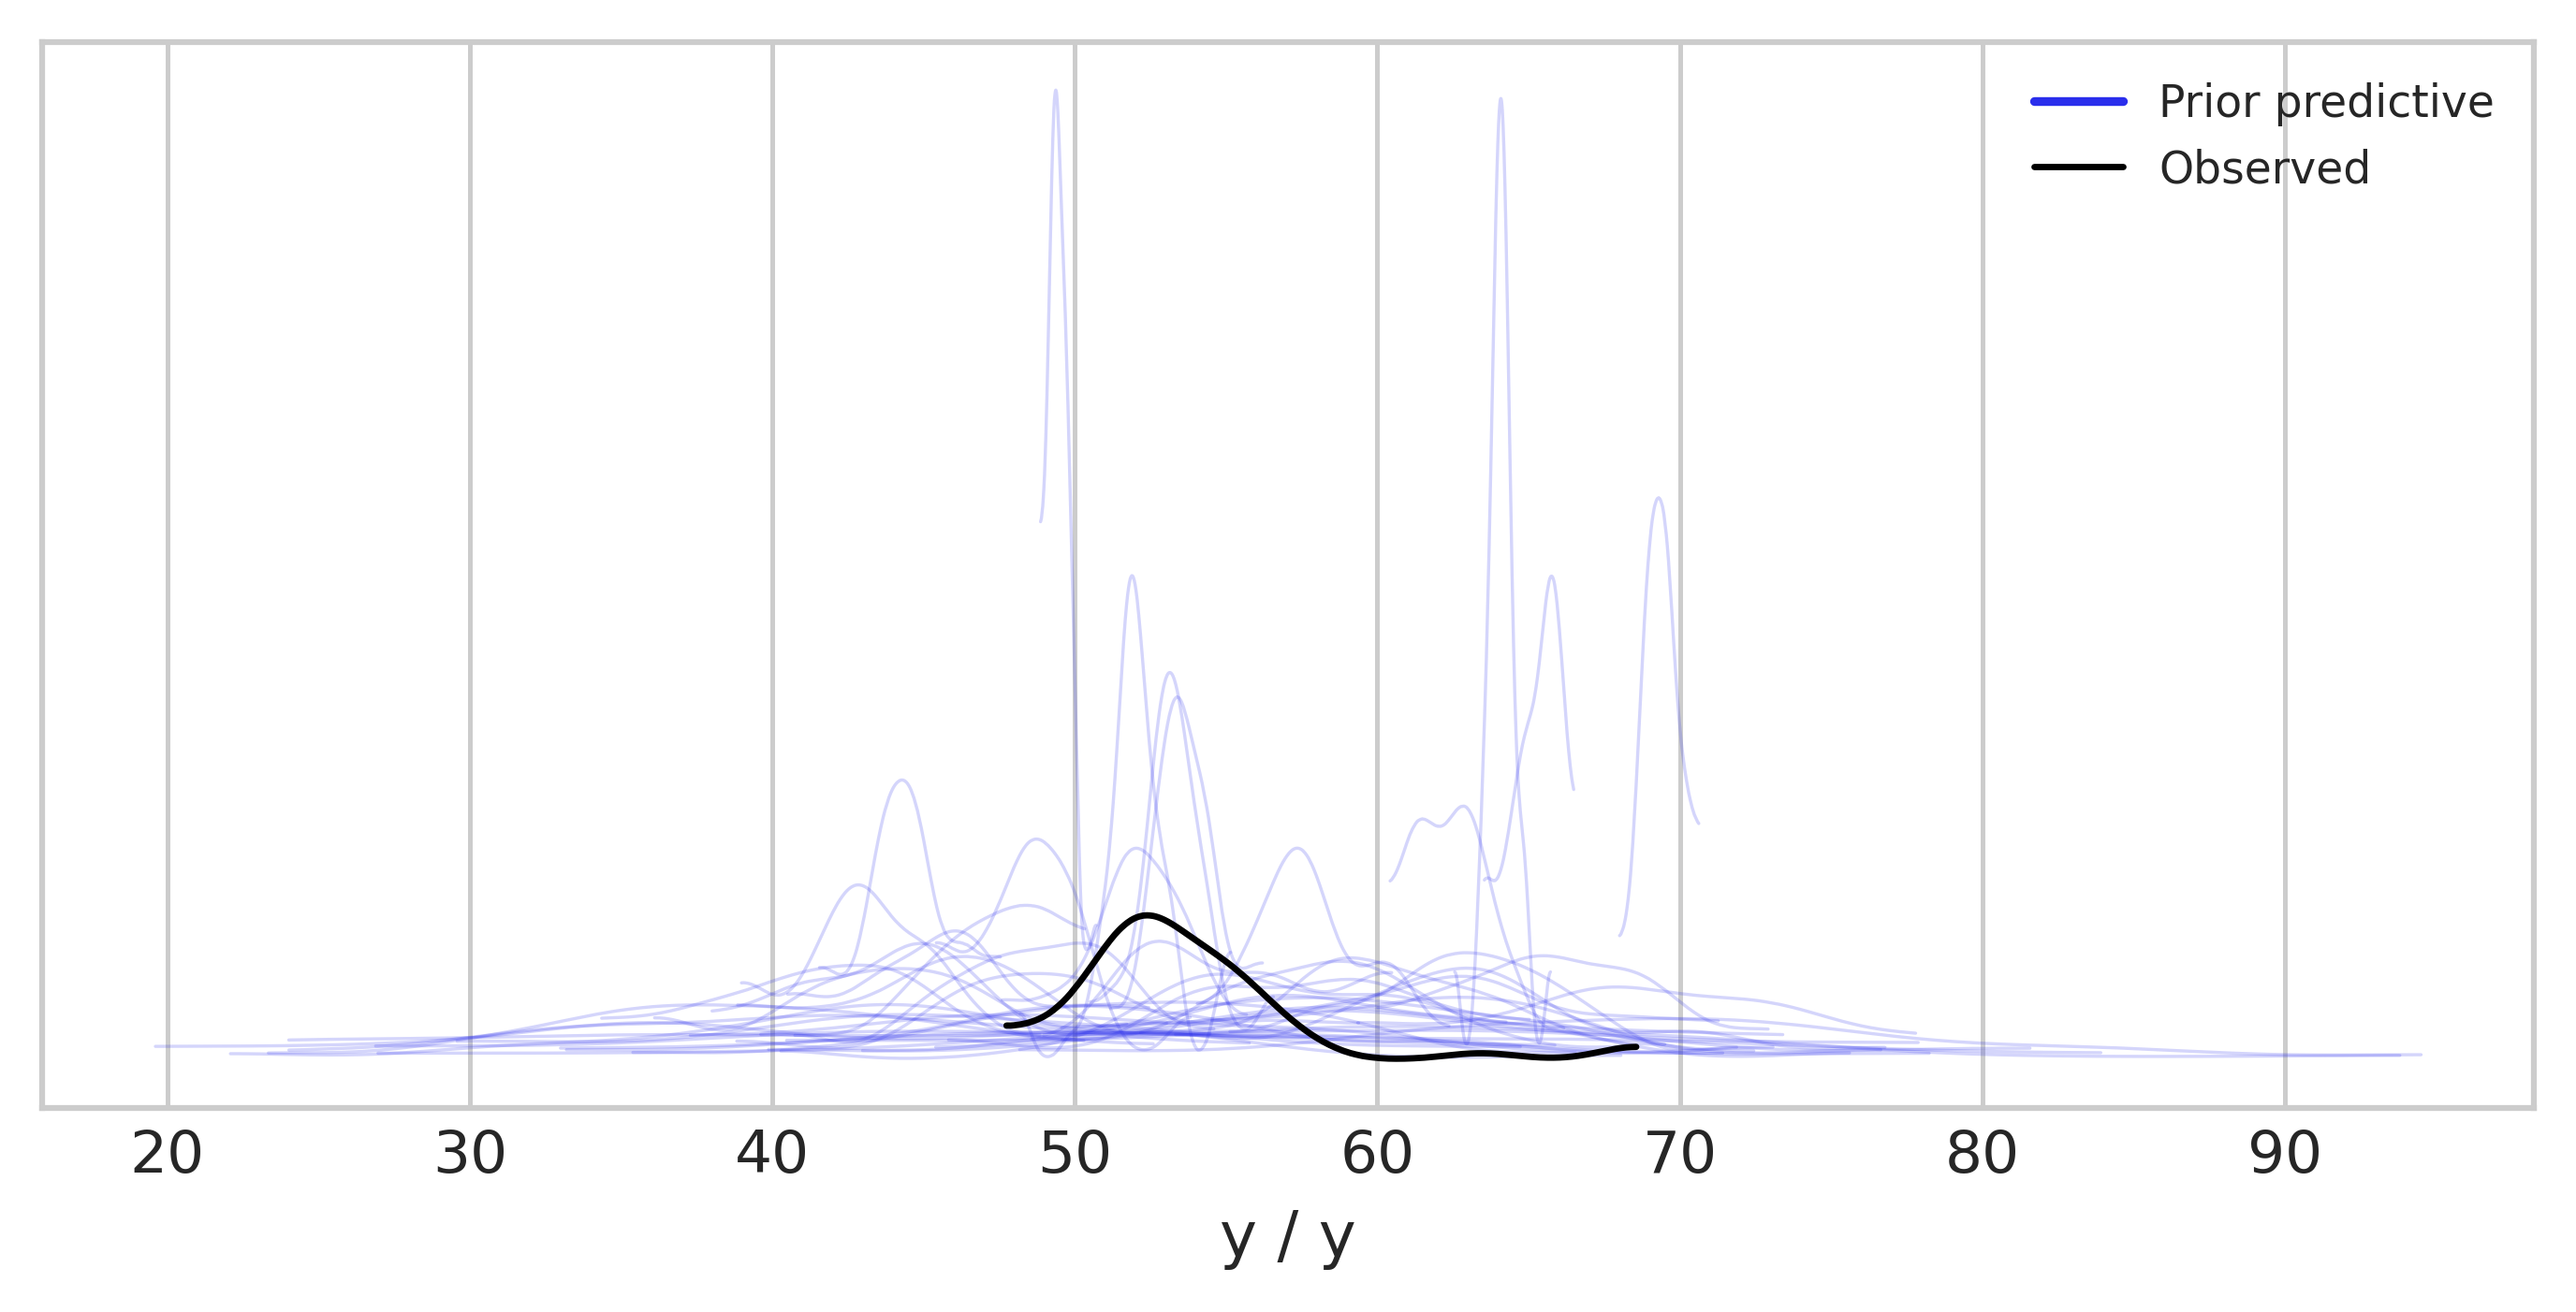

In [92]:
idata_g = pm.sample_prior_predictive(samples=50, model=model_g, random_seed=124)

ax = az.plot_ppc(idata_g, kind="kde", group="prior", mean=False, figsize=(6,3))

plt.draw()

In [ ]:
# Run posterior sampling 
idata_g.extend(
    pm.sample(random_seed=4591, model=model_g), 
    join='right'
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


In [91]:
idata_g

In [88]:
az.plot_trace(idata_g, compact=False);

ValueError: Can only convert xarray dataarray, xarray dataset, dict, netcdf filename, numpy array, pystan fit, emcee fit, pyro mcmc fit, numpyro mcmc fit, cmdstan fit csv filename, cmdstanpy fit to InferenceData, not NoneType

In [89]:
az.plot_pair(idata_g,  marginals=True)

ValueError: Can only convert xarray dataarray, xarray dataset, dict, netcdf filename, numpy array, pystan fit, emcee fit, pyro mcmc fit, numpyro mcmc fit, cmdstan fit csv filename, cmdstanpy fit to InferenceData, not NoneType

array([[<Axes: >, None],
       [<Axes: xlabel='μ', ylabel='σ'>, <Axes: >]], dtype=object)

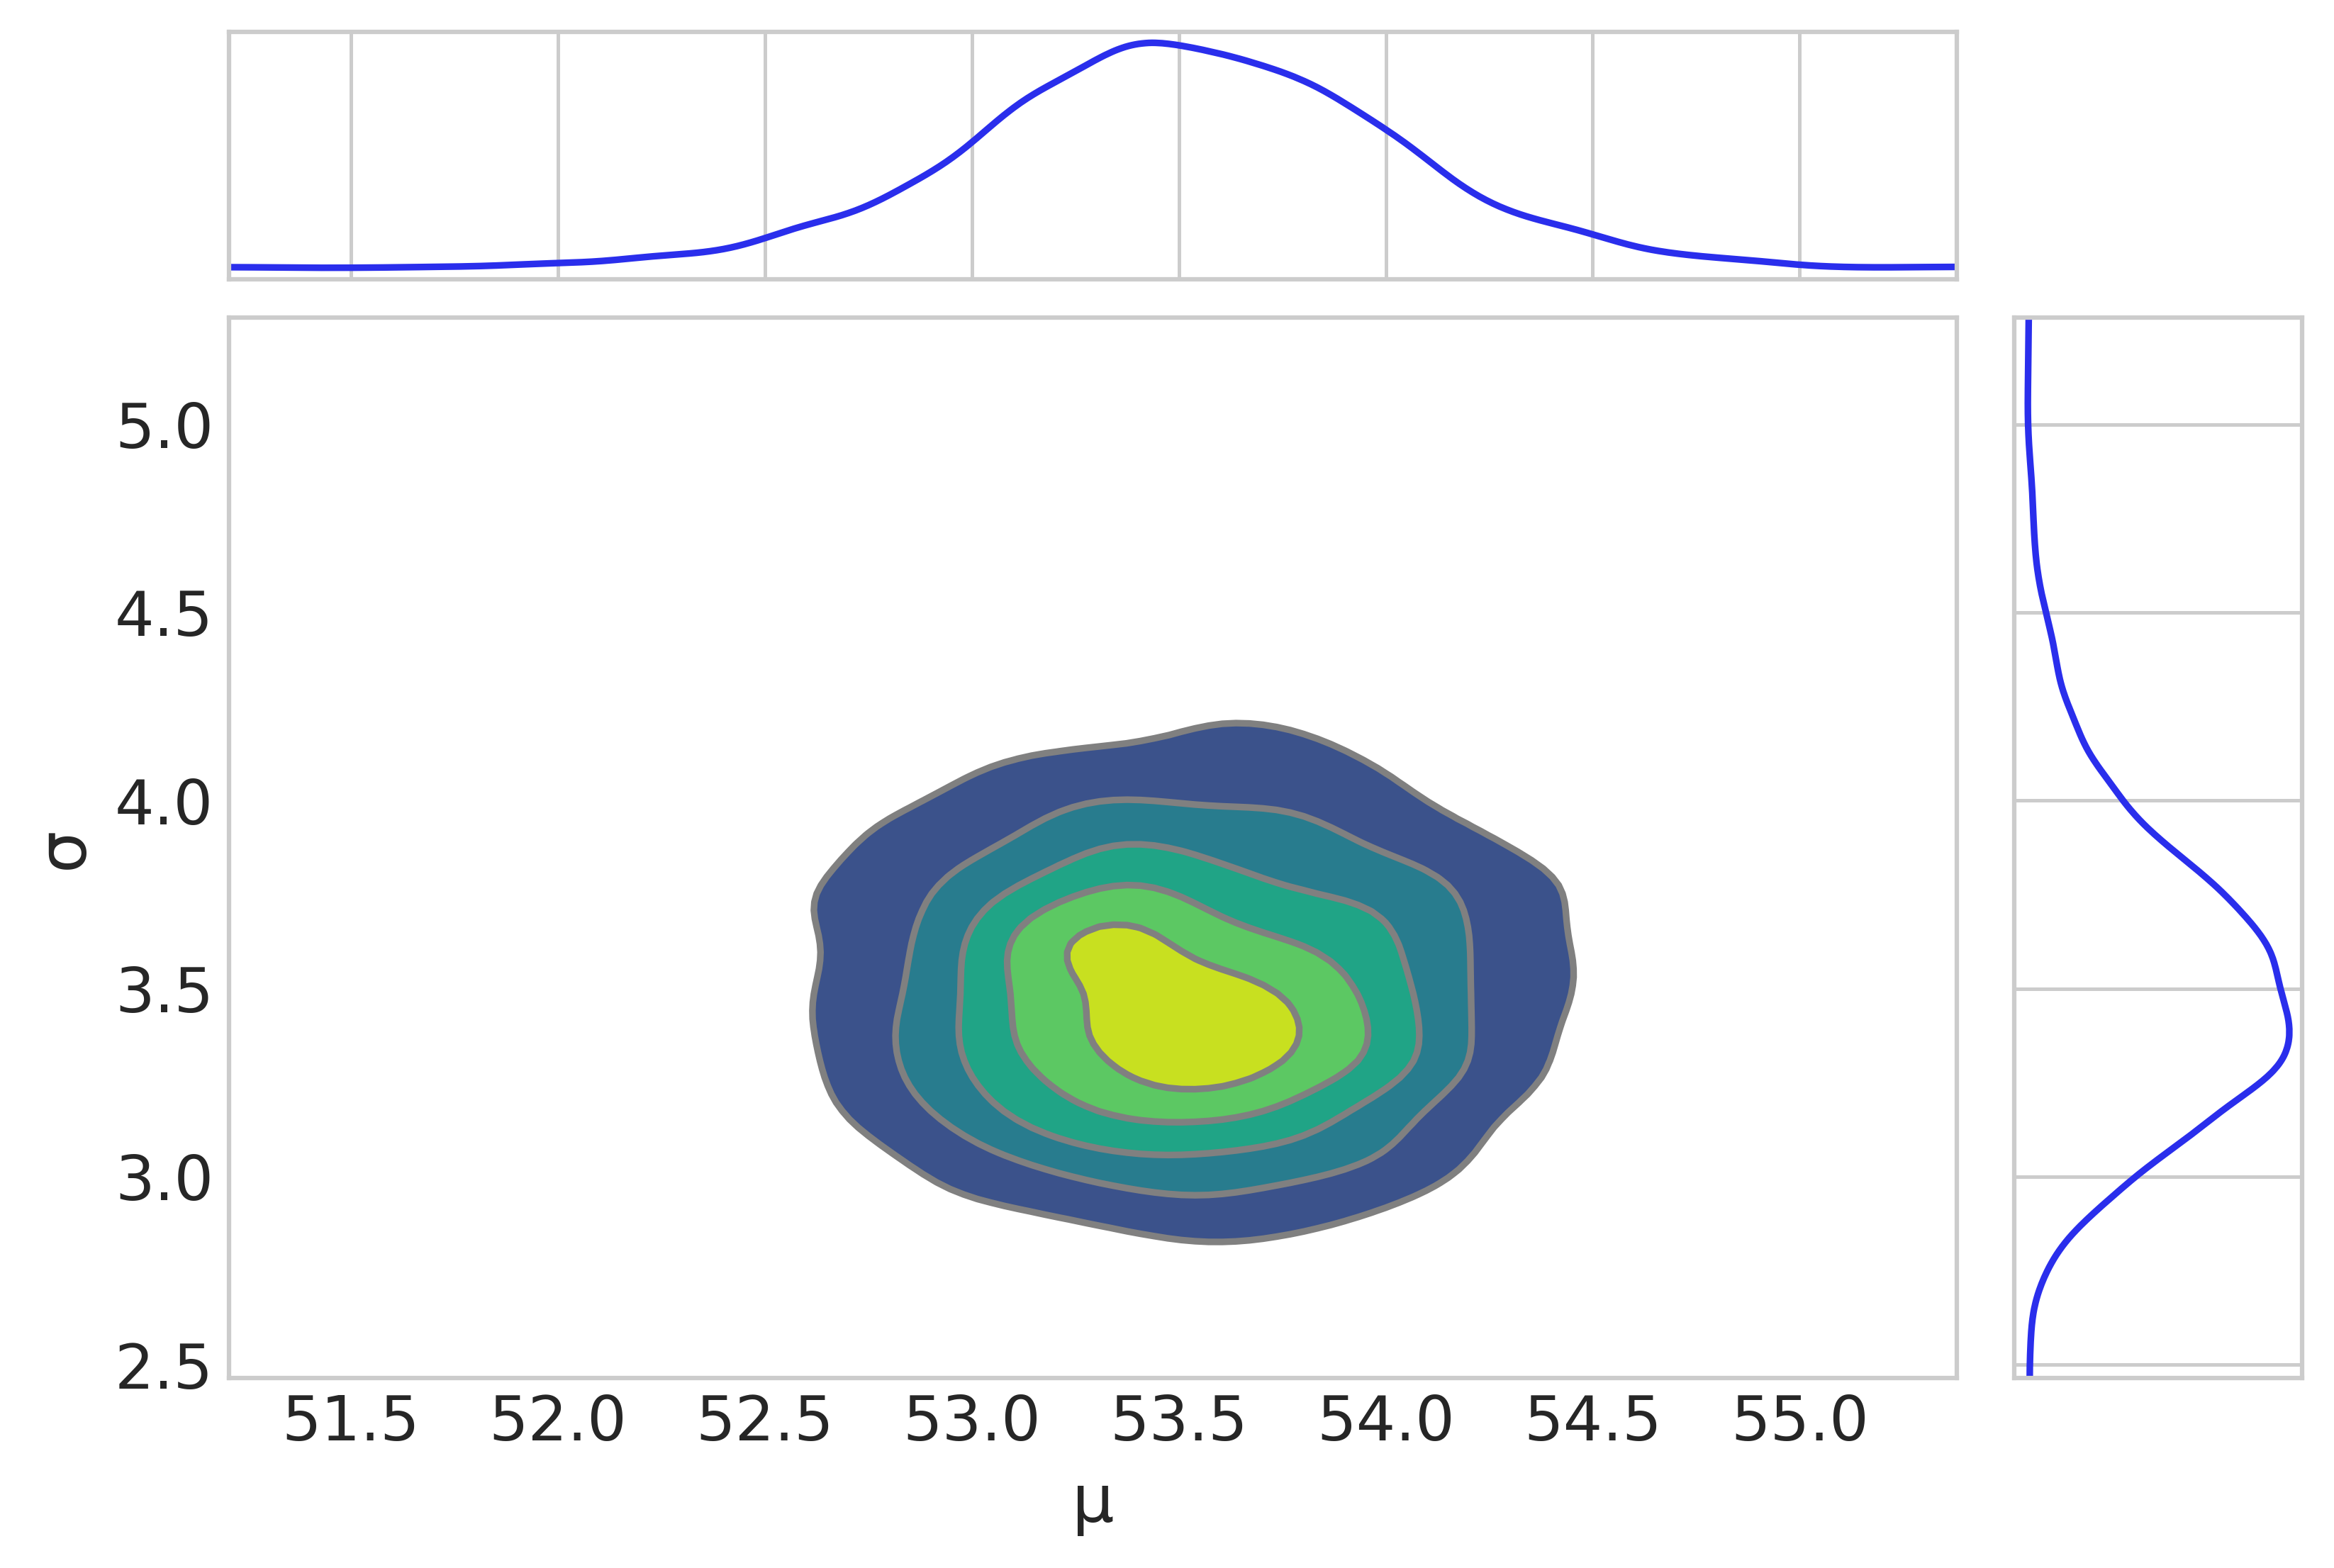

In [44]:
az.plot_pair(idata_g, kind='kde', marginals=True)

In [29]:
np.random.seed(123)
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = pz.Binomial(n=1, p=theta_real).rvs(trials)
data

array([1, 0, 0, 0], dtype=int64)

In [30]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=theta, observed=data)

In [31]:
idata = pm.sample(1000, model=our_first_model, random_seed=4591)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


In [32]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

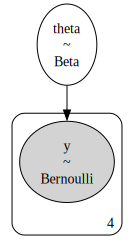

In [33]:
pm.model_to_graphviz(our_first_model)

In [34]:
our_first_model.basic_RVs

[theta ~ Beta(1, 1), y ~ Bernoulli(theta)]

In [35]:
pytensor.dprint(y)

NameError: name 'pytensor' is not defined

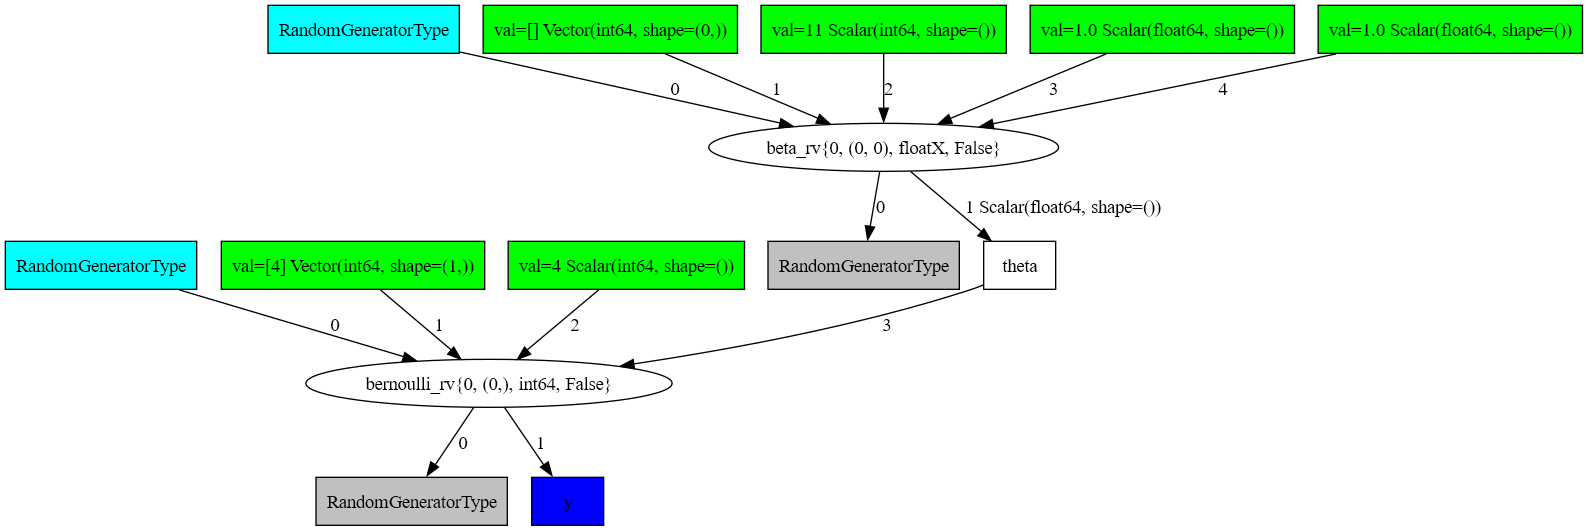

In [ ]:
# Generate the graph image data without writing to disk
img_data = pydotprint(y, format="png", var_with_name_simple=True, return_image=True)

# Display the image in a Jupyter/Colab notebook
from IPython.display import Image, display
display(Image(img_data))

In [ ]:
for i in range(10):
    print(f"Pytensor sample {i}: {theta.eval()}")

Pytensor sample 0: 0.8489881010519497
Pytensor sample 1: 0.8489881010519497
Pytensor sample 2: 0.8489881010519497
Pytensor sample 3: 0.8489881010519497
Pytensor sample 4: 0.8489881010519497
Pytensor sample 5: 0.8489881010519497
Pytensor sample 6: 0.8489881010519497
Pytensor sample 7: 0.8489881010519497
Pytensor sample 8: 0.8489881010519497
Pytensor sample 9: 0.8489881010519497


In [ ]:
for i in range(10):
    print(f"Sample {i}: {pm.draw(theta)}")

Sample 0: 0.3214593328124708
Sample 1: 0.6024116644437375
Sample 2: 0.8895302033498534
Sample 3: 0.033945362500091766
Sample 4: 0.2711953028340261
Sample 5: 0.8961285453024458
Sample 6: 0.639780767253551
Sample 7: 0.20603848957463827
Sample 8: 0.29239404798906177
Sample 9: 0.8141154249184214


In [ ]:
for i in range(10):
    random_theta, random_y = pm.draw([theta, y])
    print(f"Sample {i}: theta = {random_theta}, y = {random_y}")


Sample 0: theta = 0.3375088815740274, y = [0 0 0 0]
Sample 1: theta = 0.7348423891036555, y = [1 1 0 1]
Sample 2: theta = 0.7555484464678921, y = [1 0 0 1]
Sample 3: theta = 0.4807297894083154, y = [1 0 1 0]
Sample 4: theta = 0.18887547411749453, y = [0 0 0 0]
Sample 5: theta = 0.152209894942163, y = [0 0 0 0]
Sample 6: theta = 0.9786894287125124, y = [1 1 1 1]
Sample 7: theta = 0.8248149018377692, y = [0 1 0 1]
Sample 8: theta = 0.9336616771169851, y = [1 1 1 1]
Sample 9: theta = 0.8228300841338725, y = [1 1 0 1]


In [ ]:
from scipy import special 

sample_theta  = pm.draw(theta)    

logp_func = our_first_model.compile_logp()
joint_logp = logp_func({"theta_logodds__": special.logit(sample_theta)})

print("Sampled theta:", sample_theta)
print("Sampled y:", data)
print("Joint log probability:", joint_logp)

Sampled theta: 0.3722104321712149
Sampled y: [1 0 0 0]
Joint log probability: -3.8387928204975976
